Q1\
This dataset can be used to predict whether a patient has chronic kidney disease as a variable that can be collected from a hospital over a nearly 2-month period. And we used 24 features for classification to divide patients into two groups for observation.

In [33]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

In [44]:
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

Q2

In [45]:
X1 = X.copy()

In [46]:
from sklearn.preprocessing import LabelEncoder
Binary_var = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

encoder = LabelEncoder()
for var in Binary_var:
    X1[var] = encoder.fit_transform(X[var])
y = y.replace('ckd\t','ckd')
y = pd.DataFrame(encoder.fit_transform(y))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q3

In [145]:
print('---------------------Feature---------------------------')
print(X1.info())
print(X1.describe())
print('-----------------------------Target----------------------------')
print(y.info())
print(y.describe())

---------------------Feature---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int32  
 6   pc      400 non-null    int32  
 7   pcc     400 non-null    int32  
 8   ba      400 non-null    int32  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int32  
 19  dm      400 non-null    int32  
 20  cad     400 non-null

C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

Variables: The dataset features a range of both continuous and categorical variables: Continuous Variables and Categorical Variables.

Summaries: The dataset displays a range of values for its categorical variables, with quartiles at 0% and 25%, and 50%, 75%, and maximum values at 1. This uniform distribution suggests that these categorical variables are binary indicators, with roughly half of the observations showing the presence (1) of a characteristic relevant to CKD.

Observation Counts:
Each variable in the dataset has a 'non-null' count of 400, indicating a complete dataset with no missing values in the provided snapshot, which is essential for consistent and reliable analysis.

Q4\


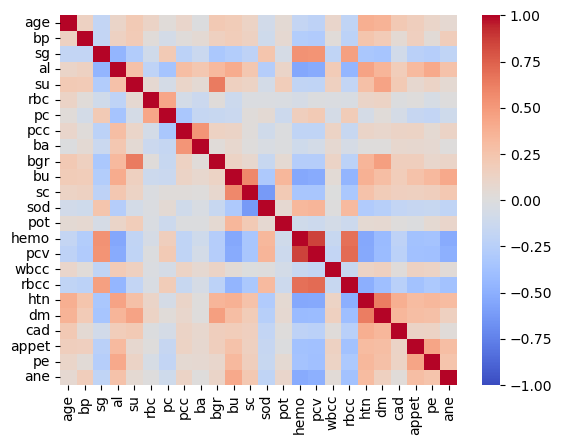

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

Corr = X1.corr()
sns.heatmap(Corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

The heatmap above shows the correlation between various variables in the Chronic Kidney Disease (CKD) dataset. While the specifics of the correlations are not clearly visible, I can make some general statements about the association between variables and their implications for feature selection or extraction. The existence of high correlation means that we can use some kind of dimensionality reduction method to reduce the correlation between features.

Q5\
If the missing values are MCAR and constitute a small proportion of the data, you might choose to simply delete those cases. However, this can lead to a loss of information and potentially bias if the assumption of MCAR is incorrect.For MAR data, you might impute missing values using methods like mean or median imputation for continuous variables, or mode imputation for categorical variables.

In [62]:
Feature = X1.columns.to_list()
Continuous_var = [x for x in Feature if x not in Binary_var]
for var in Continuous_var:
    X1[var] = X[var].fillna(X[var].mean())

Q6\
We detect outliers by examining the statistical description. Outliers are identified when values significantly surpass or fall below the 75th or 25th percentiles, or extend beyond the 3 sigma interval. Upon inspecting the statistical data, we observe outliers in the variables: bp, bgr, wbcc, bu, sc, sod, and pot.

In [79]:
from scipy.stats.mstats import winsorize

outlier_var = ['bp', 'bgr', 'wbcc', 'bu', 'sc', 'sod', 'pot']
for var in outlier_var:
    X1[var] = winsorize(X1[var], limits=[0.05, 0.05])

Q7\
We decide to perform K-means clustering on the data and use PCA to reduce the dimension to 2 dims.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


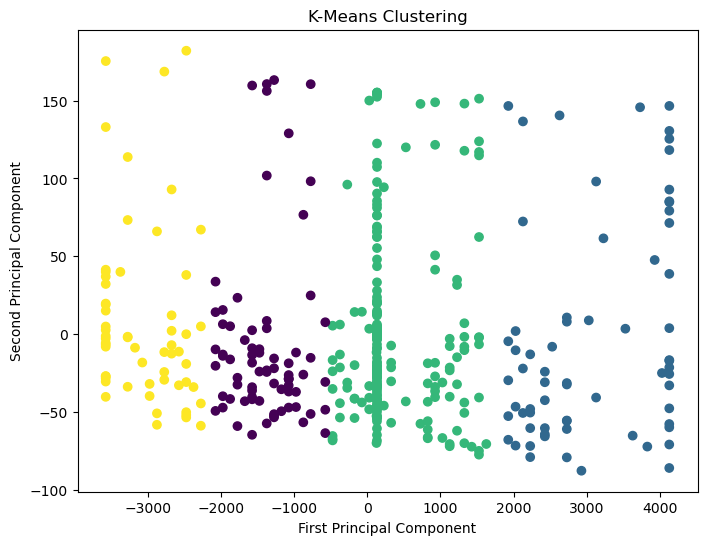

In [95]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Kmeans = KMeans(n_clusters=4, n_init=10)
Kmeans.fit(X1)
labels = Kmeans.labels_

PCA_method = PCA(n_components=8)
X1_PCA = PCA_method.fit_transform(X1)
plt.figure(figsize=(8, 6))
plt.scatter(X1_PCA[:, 0], X1_PCA[:, 1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering')
plt.show()

Q8

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X1, y, test_size=0.3, random_state=1)

Q9\
I choose decision tree and SVM. These two are commonly used in classification tasks and offer the benefit of straightforward interpretation.


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Q10\
I use accuracy and F1 score as performance metrics. Accuracy assesses the classification result's overall correctness, while F1 score amalgamates precision and recall into one metric, making it valuable for evaluating models in scenarios with imbalanced samples.

Q11

I use PCA for feature extraction. Initially, we conduct PCA on the dataset and subsequently employ the scree plot to ascertain the number of principal components to incorporate into the model.

In [122]:
PCA_ = PCA(n_components=8)
X_train_PCA = PCA_.fit_transform(X_train)
X_test_PCA = PCA_.transform(X_test)

Q12

In [128]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_DT = DT.predict(X_test)
y_pred_SVM = SVM.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)

In [133]:
DT_enhanced = DecisionTreeClassifier()
DT_enhanced.fit(X_train_PCA, y_train)
y_pred_DTe = DT_enhanced.predict(X_test_PCA)
acc_DT1 = accuracy_score(y_test, y_pred_DTe)
f1_DT1 = f1_score(y_test, y_pred_DTe)

In [134]:
print("DT Accuracy:", acc_DT)
print("DT F1:", f1_DT)
print("SVM Accuracy:", acc_SVM)
print("SVM F1:", f1_SVM)
print("DTe Accuracy:", acc_DT1)
print("DTe F1:", f1_DT1)

DT Accuracy: 0.9583333333333334
DT F1: 0.9504950495049505
SVM Accuracy: 0.9666666666666667
SVM F1: 0.9615384615384615
DTe Accuracy: 0.9333333333333333
DTe F1: 0.9166666666666666


The outcome indicates that the dimension reduction method isn't improving performance on this dataset, possibly because the gap between training and testing data is minimal. Moreover, we observed that Support Vector Machine (SVM) outperforms Decision Tree, suggesting the data might be linearly separable, a notion that can be confirmed through feature clustering.

Q13

In [139]:
DT.fit(X1, y)
importance = DT.feature_importances_
importance_feature = pd.DataFrame({
    'feature': Feature,
    'importance': importance
}, columns=['feature', 'importance'])
importance_feature

,feature,importance
0,age,0.000000
1,bp,0.000000
2,sg,0.172346
3,al,0.020742
4,su,0.000000
5,rbc,0.000000
6,pc,0.000000
7,pcc,0.000000
8,ba,0.000000
9,bgr,0.014222


By analyzing these key predictors with an interpretable classifier, medical professionals gain actionable insights that can significantly impact patient care outcomes, emphasizing the importance of targeted screening and personalized patient management in chronic conditions like kidney disease.  When using a Decision Tree model, we noticed that only a few features are crucial for splitting the nodes. However, we're facing a challenge where the information from the other features isn't being fully utilized

Q15\
The first half of the question was written by Ziyun Zhou, and the second half was written by Hongyu Wei, but in the end we discussed and revised the answers together.